# Лабораторная работа 3
## Сиразетдинов Азат 368796

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [166]:
data = pd.read_csv('california_housing_train.csv')
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

### Получите и визуализируйте (графически) статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).

In [167]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


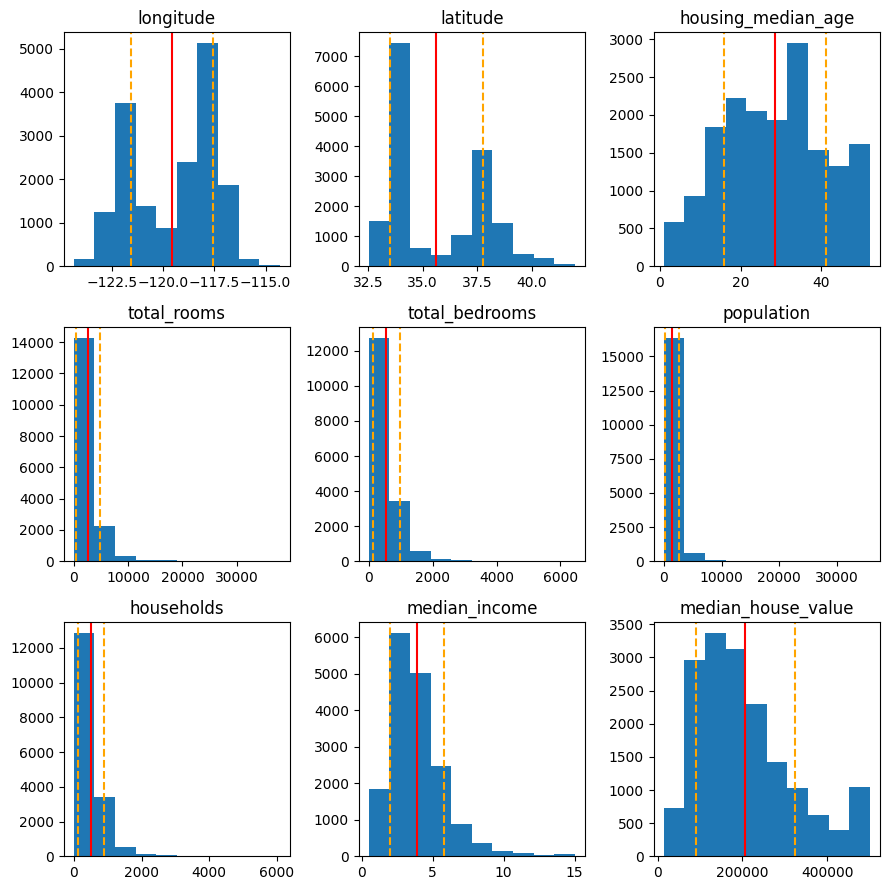

In [168]:
plt.figure(figsize=(9, 9))
for i, column in enumerate(data.columns):
    plt.subplot(3, 3, i+1)
    offset = data[column].std()
    mid = data[column].mean()
    plt.hist(data[column])
    plt.title(column)
    plt.axvline(mid, color='red')
    plt.axvline(mid - offset, color='orange', linestyle='--')
    plt.axvline(mid + offset, color='orange', linestyle='--')
plt.tight_layout()
plt.show()

### Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка

In [169]:
data = data.dropna()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
assert categorical_columns.values.size == 0

scaler = MinMaxScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,1.000000,0.175345,0.274510,0.147885,0.198945,0.028364,0.077454,0.068530,66900.0
1,0.984064,0.197662,0.352941,0.201608,0.294848,0.031559,0.075974,0.091040,80100.0
2,0.975100,0.122210,0.313725,0.018927,0.026847,0.009249,0.019076,0.079378,85700.0
3,0.974104,0.116897,0.254902,0.039515,0.052142,0.014350,0.037000,0.185639,73400.0
4,0.974104,0.109458,0.372549,0.038276,0.050435,0.017405,0.042921,0.098281,65500.0
...,...,...,...,...,...,...,...,...,...
16995,0.008964,0.854410,1.000000,0.058389,0.060987,0.025337,0.060516,0.128081,111400.0
16996,0.007968,0.866100,0.686275,0.061869,0.081782,0.033381,0.076303,0.139170,79000.0
16997,0.004980,0.988310,0.313725,0.070515,0.082247,0.034782,0.074823,0.174577,103600.0
16998,0.004980,0.984060,0.352941,0.070384,0.085506,0.036296,0.078441,0.102054,85800.0


### Разделите данные на обучающий и тестовый наборы данных.

In [170]:
X = data.drop(columns=['median_house_value'])
Y = data['median_house_value']
X = np.c_[np.ones(X.shape[0]), X]  # bias

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas (для использования коэффициентов использовать библиотеки тоже нельзя). Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.

In [171]:
def lin_reg(X, Y):
    B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    return B

In [172]:
def r_squared(Y_pred, Y):
    return 1 - ((Y_pred - Y) ** 2).sum() / ((Y.mean() - Y) ** 2).sum()

### Модель 1
Все признаки

In [173]:
B_model1 = lin_reg(X_train, Y_train)
Y_pred_model1 = np.dot(X_test, B_model1)
r2_model1 = r_squared(Y_test, Y_pred_model1)
print(f"r^2 для модели 1 со всеми признаками: {r2_model1}")

r^2 для модели 1 со всеми признаками: 0.44923620463991465


### Модель 2
Без координат

In [182]:
X_train_model2 = np.delete(X_train, [1, 2], axis=1)
X_test_model2 = np.delete(X_test, [1, 2], axis=1)
B_model2 = lin_reg(X_train_model2, Y_train)
Y_pred_model2 = np.dot(X_test_model2, B_model2)
r2_model2 = r_squared(Y_test, Y_pred_model2)
print(f"r^2 для модели 2 без учета координат: {r2_model1}")

np.float64(0.24218222589106042)

### Модель 3

Без учета количества владельцев

In [183]:
X_train_model3 = np.delete(X_train, 7, axis=1)
X_test_model3 = np.delete(X_test, 7, axis=1)
B_model3 = lin_reg(X_train_model3, Y_train)
Y_pred_model3 = np.dot(X_test_model3, B_model3)
r2_model3 = r_squared(Y_test, Y_pred_model3)
print(f"r^2 для модели 3 без учета количества владельцев: {r2_model3}")

r^2 для модели 3 без учета количества владельцев: 0.4485956169180224


Лучше всего показала себя модель 1 и 3
Можно сделать вывод что локация дома сильно коррелирует со стоимостью, а количество владельцев оказывает очень слабое влияние